<a href="https://colab.research.google.com/github/ms-gsood7/Email_Classification/blob/main/Email_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: this is an email classification project

In [ ]:
#!pip install tensorflow_hub

In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 44.3 MB/s eta 0:00:00


In [ ]:

#import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns




In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
#preprocess the text
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

#create_hub layer




In [ ]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [ ]:
#text_test=['nice movie indeed', 'I love python programming','Good to see you', 'i like reading']
text_test = ['nice movie indeed','I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_mask', 'input_word_ids', 'input_type_ids'])

In [ ]:
text_preprocessed['input_mask']

#CLS, SEP: special token 

#CLS nice movie indeed SEP
# 2*128: 2 elements, max length of sentence

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [ ]:
text_preprocessed['input_type_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [ ]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [ ]:
bert_model = hub.KerasLayer(encoder_url)
#acts like a function pointer

#generated sentence for word embedding

bert_results=bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['default', 'pooled_output', 'sequence_output', 'encoder_outputs'])

In [ ]:
bert_results['pooled_output']
#embedding for the entire sentence
#embedding vector size=768


<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.791774  , -0.21411902,  0.49769545, ...,  0.24465242,
        -0.47334465,  0.8175868 ],
       [-0.91712296, -0.47935185, -0.78656995, ..., -0.61751765,
        -0.71026856,  0.92184293]], dtype=float32)>

In [ ]:
bert_results['sequence_output']
#individual word embedding vectors
#128: each individual sentence padding

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292041,  0.08567816,  0.14476837, ..., -0.0967708 ,
          0.08722115,  0.07711103],
        [ 0.17839377, -0.19006082,  0.50349444, ..., -0.05869827,
          0.32717147, -0.15578502],
        [ 0.18701456, -0.4338877 , -0.48875162, ..., -0.1550281 ,
          0.00145131, -0.24470958],
        ...,
        [ 0.12083077,  0.12884237,  0.46453524, ...,  0.07375517,
          0.17441934,  0.16522089],
        [ 0.07967839, -0.01190699,  0.5022542 , ...,  0.13777757,
          0.21002182,  0.0062461 ],
        [-0.07212706, -0.2830349 ,  0.5903332 , ...,  0.47551912,
          0.1666846 , -0.08920319]],

       [[-0.07900587,  0.36335132, -0.2110159 , ..., -0.17183743,
          0.16299748,  0.6724267 ],
        [ 0.27883568,  0.43716288, -0.35764778, ..., -0.04463685,
          0.3831519 ,  0.588798  ],
        [ 1.2037668 ,  1.0727028 ,  0.48408768, ...,  0.24921045,
          0.40730873,  0.4048177 ],
        ...,

In [ ]:
bert_results['encoder_outputs'][0]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.12901425,  0.0064474 , -0.03614967, ...,  0.04999621,
          0.06149199, -0.02657534],
        [ 1.1753383 ,  1.2140784 ,  1.1569982 , ...,  0.11634377,
         -0.3585536 , -0.40490198],
        [ 0.03859022,  0.53869987, -0.21089768, ...,  0.21858197,
          0.7260166 , -1.1158605 ],
        ...,
        [-0.07587015, -0.25421888,  0.7075511 , ...,  0.50542   ,
         -0.18878672,  0.1502834 ],
        [-0.16066599, -0.28089687,  0.57597077, ...,  0.5275854 ,
         -0.11141385,  0.02887553],
        [-0.04428148, -0.20279586,  0.59093565, ...,  0.81338364,
         -0.3907581 , -0.02601735]],

       [[ 0.18903589,  0.02752547, -0.06513736, ..., -0.00620209,
          0.15053898,  0.03165447],
        [ 0.591615  ,  0.758914  , -0.07240664, ...,  0.6190398 ,
          0.829289  ,  0.16161953],
        [ 1.4460828 ,  0.44602656,  0.40990266, ...,  0.48255897,
          0.6269114 ,  0.13463427],
        ...,

Email Classification

bert generates embedding vectors for text which can be fed into neural network for training





In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
df_dataset = pd.read_csv('/content/spam.csv')

In [ ]:
df_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_dataset.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df_dataset['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

used downsampling to correct the imbalance in the dataset
This means, from 4825 emails, pick any 747 ham emails to get a balance in the dataset -> get equal number of spam and ham


In [ ]:
df_ham=df_dataset[df_dataset['Category']=='ham']
df_ham.shape

(4825, 2)

In [ ]:
df_spam=df_dataset[df_dataset['Category']=='spam']
df_spam.shape

(747, 2)

In [ ]:
df_ham_downsample=df_ham.sample(df_spam.shape[0])
df_ham_downsample.head()

,Category,Message
3114,ham,"Wat time liao, where still got."
5114,ham,Argh why the fuck is nobody in town ;_;
21,ham,I‘m going to try for 2 months ha ha only joking
2016,ham,Just re read it and I have no shame but tell m...
2041,ham,You always make things bigger than they are


In [ ]:
df_ham_downsample.shape

(747, 2)

In [ ]:
df_balanced=pd.concat([df_spam,df_ham_downsample])
df_balanced.shape

(1494, 2)

In [ ]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
df_balanced.sample(5)

,Category,Message
667,ham,Carlos'll be here in a minute if you still nee...
1065,ham,"That's fine, I'll bitch at you about it later ..."
756,ham,So why didnt you holla?
5482,spam,URGENT We are trying to contact you Last weeke...
312,spam,Think ur smart ? Win £200 this week in our wee...


In [ ]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [ ]:
df_balanced.sample(5)

,Category,Message,spam
1168,ham,Lol now I'm after that hot air balloon!,0
5114,ham,Argh why the fuck is nobody in town ;_;,0
2014,spam,Great News! Call FREEFONE 08006344447 to claim...,1
3715,ham,"Oh, i will get paid. The most outstanding one ...",0
3443,spam,Save money on wedding lingerie at www.bridal.p...,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_split, y_train, y_split = train_test_split(df_balanced['Message'], df_balanced['spam'],stratify=df_balanced['spam'])

#stratify: in train and test the distribution of categories is equal

In [ ]:
x_train.head()

5110      You have 1 new message. Please call 08715205273
2061             I did. One slice and one breadstick. Lol
4442    I'm going 2 orchard now laready me reaching so...
4658    PRIVATE! Your 2003 Account Statement for shows...
3530    Xmas & New Years Eve tickets are now on sale f...
Name: Message, dtype: object

In [ ]:
#preprocess the text
#urls to download the models locally on your computer

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

now provide sentence/ text to bert model to create a length vector


get_sentence_embedding(''--> returns 768 length vector)
call preprocess on test text-> get the preprcess test as o/p 
which is supplied to the encoder
encoder will return a dictionary: from
the dict we need to choose pooled output

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435168 , -0.5132724 , -0.88845694, ..., -0.74748826,
        -0.7531471 ,  0.91964483],
       [-0.8720836 , -0.5054398 , -0.9444669 , ..., -0.85847515,
        -0.71745366,  0.8808298 ]], dtype=float32)>

In [ ]:
#examples
e=get_sentence_embeding(['apple','órange','grape','banana',
                       'elon musk','jeff bezdoz','bill gates'
])

In [ ]:
e #embedding for all the words

<tf.Tensor: shape=(7, 768), dtype=float32, numpy=
array([[-0.8196456 , -0.2960961 ,  0.20951769, ...,  0.25593367,
        -0.5874298 ,  0.8434556 ],
       [-0.8363078 , -0.23830143,  0.38453507, ...,  0.45564714,
        -0.6078617 ,  0.827889  ],
       [-0.85408497, -0.17408392,  0.23000868, ...,  0.22893798,
        -0.5581088 ,  0.8516548 ],
       ...,
       [-0.7504134 , -0.26812598, -0.26689604, ...,  0.02839445,
        -0.5938098 ,  0.79749876],
       [-0.77913094, -0.29154903, -0.3079071 , ...,  0.15102522,
        -0.46912664,  0.75178295],
       [-0.78544384, -0.299497  ,  0.41027424, ...,  0.5222542 ,
        -0.49573553,  0.8150752 ]], dtype=float32)>

If 2 vectors are pointing in th esame direction, then their cosine similarity will be close to 1

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.99018115]], dtype=float32)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[4]],[e[5]])

array([[0.9853709]], dtype=float32)

2 ways to create a tensor flow model: Sequential and Functional

In [ ]:
#Bert layers
text_input= tf.keras.layers.Input(shape=(),dtype=tf.string, name='text' )

preprocessed_text = bert_preprocess(text_input)

outputs = bert_encoder(preprocessed_text)


#neural network layer
#create a dropout layer -> check video

layer1= tf.keras.layers.Dropout(0.1, name='Dropout')(outputs['pooled_output'])
layer1 = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer1)

#construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[layer1])



In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]



model.compile(optimizer='adam',
              loss='binary_crossentropy', #training is driven by loss function
              metrics=METRICS
              )

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 572s 16s/step - loss: 0.6669 - accuracy: 0.6223 - precision: 0.6129 - recall: 0.6643
Epoch 2/10
35/35 [==============================] - 562s 16s/step - loss: 0.5460 - accuracy: 0.7625 - precision: 0.7625 - recall: 0.7625
Epoch 3/10
35/35 [==============================] - 542s 15s/step - loss: 0.4579 - accuracy: 0.8491 - precision: 0.8179 - recall: 0.8982
Epoch 4/10
35/35 [==============================] - 547s 16s/step - loss: 0.4158 - accuracy: 0.8607 - precision: 0.8519 - recall: 0.8732
Epoch 5/10
35/35 [==============================] - 542s 15s/step - loss: 0.3881 - accuracy: 0.8661 - precision: 0.8584 - recall: 0.8768
Epoch 6/10
35/35 [==============================] - 542s 15s/step - loss: 0.3537 - accuracy: 0.8777 - precision: 0.8543 - recall: 0.9107
Epoch 7/10
35/35 [==============================] - 541s 15s/step - loss: 0.3355 - accuracy: 0.8848 - precision: 0.8709 - recall: 0.9036
Epoch 8/10
35/35 [=======================

save model

In [ ]:
#mount your colab to drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


https://www.tensorflow.org/guide/keras/save_and_serialize

In [ ]:
model_save_name='email_bert_9045.pt'

path = f"/content/gdrive/My Drive/{model_save_name}" 
model.save(path)

In [ ]:
model.evaluate(x_split,y_split)

12/12 [==============================] - 209s 16s/step - loss: 0.2969 - accuracy: 0.8904 - precision: 0.8925 - recall: 0.8877


[0.29686233401298523,
 0.8903743028640747,
 0.8924731016159058,
 0.8877005577087402]

In [ ]:
y_predicted=model.predict(x_split) #gives a 2Darray
y_predicted=y_predicted.flatten() #we get a 1D array

12/12 [==============================] - 208s 17s/step


In [ ]:
import numpy as np

y_predicted=np.where(y_predicted > 0.5, 1,0)
y_predicted

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
cn=confusion_matrix(y_split,y_predicted)
cn

array([[167,  20],
       [ 21, 166]])

Text(21.78333333333333, 0.5, 'Truth')

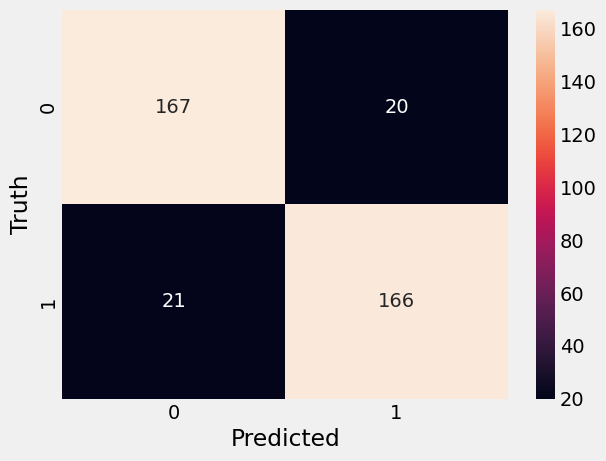

In [ ]:
sns.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
print(classification_report(y_split,y_predicted))


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       187
           1       0.89      0.89      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.89       374
weighted avg       0.89      0.89      0.89       374



Inference

In [ ]:
reviews=[
  'Sam, people are looking at your LinkedIn profile ',
  'Just from $1 a week: Save on insightful reporting.',
  'Where do all these toys go? call 09090898 to know',
  'Enter a chance to win the grand prize of $5000! hurry, offer closes soon',
  'Hey, want to catch up over coffee tomorrow?',
  'Hey Sam, you have been awarded with a sPix digital camera worth $5600. Delivery within 28 days'
]

model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.25542766],
       [0.04426109],
       [0.5388176 ],
       [0.12171147],
       [0.04969209],
       [0.5438101 ]], dtype=float32)

more than 0.5 means it is spam